In [ ]:
'''Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.
Answer:- Boosting is an ensemble learning technique that combines multiple weak learners (models that perform slightly
   better than random guessing) to create a strong learner with high accuracy.
- It works by sequentially training models, where each new model focuses on correcting the errors made by the previous ones.
 How Boosting Improves Weak Learners
- Error Reduction: Each learner focuses on the mistakes of the previous one, gradually reducing overall error.
- Weighted Voting: Final prediction is made by weighted majority voting (classification) or weighted averaging (regression),
  giving more importance to accurate learners.
- Bias Reduction: By combining many weak learners, boosting reduces bias and improves predictive power.
- Adaptive Learning: Boosting adapts to the dataset by emphasizing hard-to-classify examples.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?
Answer:AdaBoost (Adaptive Boosting)
- Error-based reweighting: After each weak learner is trained, AdaBoost increases the weights of misclassified samples so the next learner
  focuses more on those difficult cases.
- Sequential training: Learners are added one after another, each correcting the mistakes of the previous.
- Model combination: Final prediction is made by weighted majority voting (classification) or weighted averaging (regression).
- Key idea: Emphasizes data points that were misclassified.

  Gradient Boosting
- Gradient descent approach: Instead of reweighting samples, Gradient Boosting fits each new learner to the residual errors (the difference
between actual and predicted values).
- Loss minimization: Uses gradient descent to minimize a chosen loss function (e.g., mean squared error, log-loss).
- Sequential training: Each learner is trained to reduce the overall loss of the ensemble.
- Model combination: Predictions are combined additively, improving accuracy step by step.
- Key idea: Emphasizes errors (residuals) rather than sample weights.

Question 3: How does regularization help in XGBoost?
Answer:  Regularization Works in XGBoost
- Objective Function
- XGBoost’s objective function = Loss function + Regularization term.
- Regularization penalizes overly complex trees (too many leaves or large weights).
- Types of Regularization
- L1 Regularization (Lasso): Adds penalty on the absolute value of leaf weights → encourages sparsity (some weights become zero).
- L2 Regularization (Ridge): Adds penalty on the squared value of leaf weights → smooths the model and prevents extreme values.
- Tree Complexity Control
- Parameters like max_depth, min_child_weight, and gamma also act as regularizers by limiting tree growth and pruning

Question 4: Why is CatBoost considered efficient for handling categorical data?
Answer:CatBoost (short for Categorical Boosting) is a gradient boosting algorithm specifically designed to handle categorical
features effectively. Unlike other boosting methods that require heavy preprocessing (like one-hot encoding), CatBoost introduces smart
techniques to deal with categorical variables directly.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?
Answer:
        Applications Where Boosting Excels
- Fraud Detection (Banking & Finance)
- Boosting focuses on misclassified cases, making it effective for detecting rare fraudulent transactions.
- Bagging may miss minority class patterns due to averaging.
- Customer Churn Prediction (Telecom & SaaS)
- Boosting captures subtle signals in customer behavior that indicate churn.
- Useful when data is imbalanced and small errors are costly.
- Medical Diagnosis & Healthcare Analytics
- Boosting improves accuracy in disease prediction (e.g., cancer detection, diabetes risk).
- Prioritizes misclassified patients, reducing false negatives.
- Credit Scoring & Risk Assessment
- Boosting models are widely used to predict loan defaults with high precision.
- Handles complex relationships between financial variables better than bagging.
- Search Engines & Ranking Systems
- Gradient Boosting is used in ranking algorithms (e.g., learning-to-rank in search engines).
- Boosting adapts well to optimizing relevance scores.
- Recommendation Systems (E-commerce, Streaming)
- Boosting captures fine-grained user preferences.
- Improves personalization compared to bagging methods.
- Image Recognition & Computer Vision
- Boosting is effective in face detection (e.g., AdaBoost was famously used in the Viola-Jones face detector).
- Learns complex visual patterns by focusing on hard-to-classify images.

Core Reason Boosting is Preferred
- Boosting: Sequentially improves weak learners by focusing on errors → better accuracy, handles imbalanced data.
- Bagging: Reduces variance by averaging multiple models → more stable but less adaptive.
'''

In [1]:
'''Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy'''
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize AdaBoost Classifier
model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9649122807017544


In [2]:
'''Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score'''
# Import necessary libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Load the California Housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize Gradient Boosting Regressor
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance using R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

R-squared Score: 0.8004451261281281


In [1]:
'''Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy'''
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define parameter grid for learning rate tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Get best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate accuracy on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:03:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2}
Test Accuracy: 0.956140350877193


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.6 MB/s eta 0:00:00
Model Accuracy: 0.9649122807017544


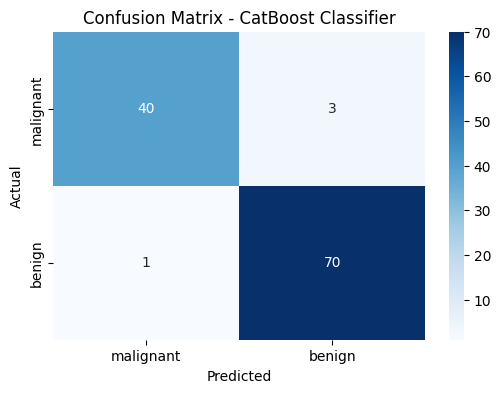

In [3]:
# Install CatBoost library if not already installed
!pip install catboost

'''Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn'''
# Import necessary libraries

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize CatBoost Classifier
model = CatBoostClassifier(iterations=200, learning_rate=0.1, depth=6, verbose=0, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Classifier")
plt.show()

In [8]:
'''Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model'''
import pandas as pd
import io
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, average_precision_score

# 1. Load the data
csv_data = """customer_id,age,annual_income,credit_score,dti,loan_amount,housing_status,employment_type,is_default
1001,34,75000,710,12.5,15000,RENT,FULL_TIME,0
1002,45,120000,680,25.4,30000,MORTGAGE,FULL_TIME,0
1003,23,30000,550,40.1,5000,RENT,PART_TIME,1
1004,50,95000,820,8.2,10000,OWN,FULL_TIME,0
1005,29,45000,610,32.0,12000,RENT,SELF_EMPLOYED,1
1006,38,62000,740,15.7,20000,MORTGAGE,FULL_TIME,0
1007,42,88000,700,22.3,25000,RENT,FULL_TIME,0
1008,31,52000,590,38.5,8000,RENT,PART_TIME,1
1009,55,140000,790,11.2,40000,MORTGAGE,FULL_TIME,0
1010,27,38000,640,28.9,7000,RENT,FULL_TIME,0
1011,40,71000,660,19.5,18000,MORTGAGE,FULL_TIME,0
1012,33,59000,,14.2,15000,RENT,FULL_TIME,0
1013,22,25000,520,45.0,3000,RENT,UNEMPLOYED,1
1014,48,110000,730,17.8,22000,OWN,FULL_TIME,0
1015,36,67000,605,35.2,14000,RENT,SELF_EMPLOYED,1"""

df = pd.read_csv(io.StringIO(csv_data))

# 2. Features and Target
X = df.drop(['customer_id', 'is_default'], axis=1)
y = df['is_default']

# Define categorical features for CatBoost
cat_features = ['housing_status', 'employment_type']

# 3. Handle Imbalance
# Calculate scale_pos_weight (negatives / positives)
neg, pos = y.value_counts()[0], y.value_counts()[1]
spw = neg / pos

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Initialize and Train CatBoost
# CatBoost handles missing values (NaNs) and categorical features automatically
model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    cat_features=cat_features,
    scale_pos_weight=spw,
    verbose=False
)

model.fit(X_train, y_train)

# 6. Evaluation
preds = model.predict(X_test)
probs = model.predict_proba(X_test)[:, 1]

print("--- Classification Report ---")
print(classification_report(y_test, preds))
print(f"PR-AUC Score: {average_precision_score(y_test, probs):.4f}")

--- Classification Report ---
              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.38         5
weighted avg       1.00      0.60      0.75         5

PR-AUC Score: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1033: